In [1]:
cd ..

/Users/deepakduggirala/Documents/autonomous-robotics/translating-images-into-maps


In [2]:
%matplotlib inline

In [3]:
import os

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import cv2

In [24]:
from src.data.dataloader_light import nuScenesMaps, read_split

from argslib import parse_args, init
from visualization import color_components, make_composite, plot_ground_truth, COLOR_MAP, color_map_labels, visualize_prediction

In [5]:
import torch

In [14]:
args = parse_args(notebook=True)
args.root = '/Users/deepakduggirala/Documents/autonomous-robotics/v1.0-trainval_meta/'
args.val_split = 'evaluation'
init(args)

In [10]:
res_100 = torch.load('notebooks/cktp-30-val-pred-100x100.pt')

In [15]:
val_data = nuScenesMaps(
        root=args.root,
        split=args.val_split,
        grid_size=args.grid_size,
        grid_res=args.grid_res,
        classes=args.load_classes_nusc,
        dataset_size=args.data_size,
        desired_image_size=args.desired_image_size,
        mini=True,
        gt_out_size=(100, 100),
        nusc_data_file='eval_data.pickle'
    )

/Users/deepakduggirala/miniforge3/envs/tim/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646835428/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


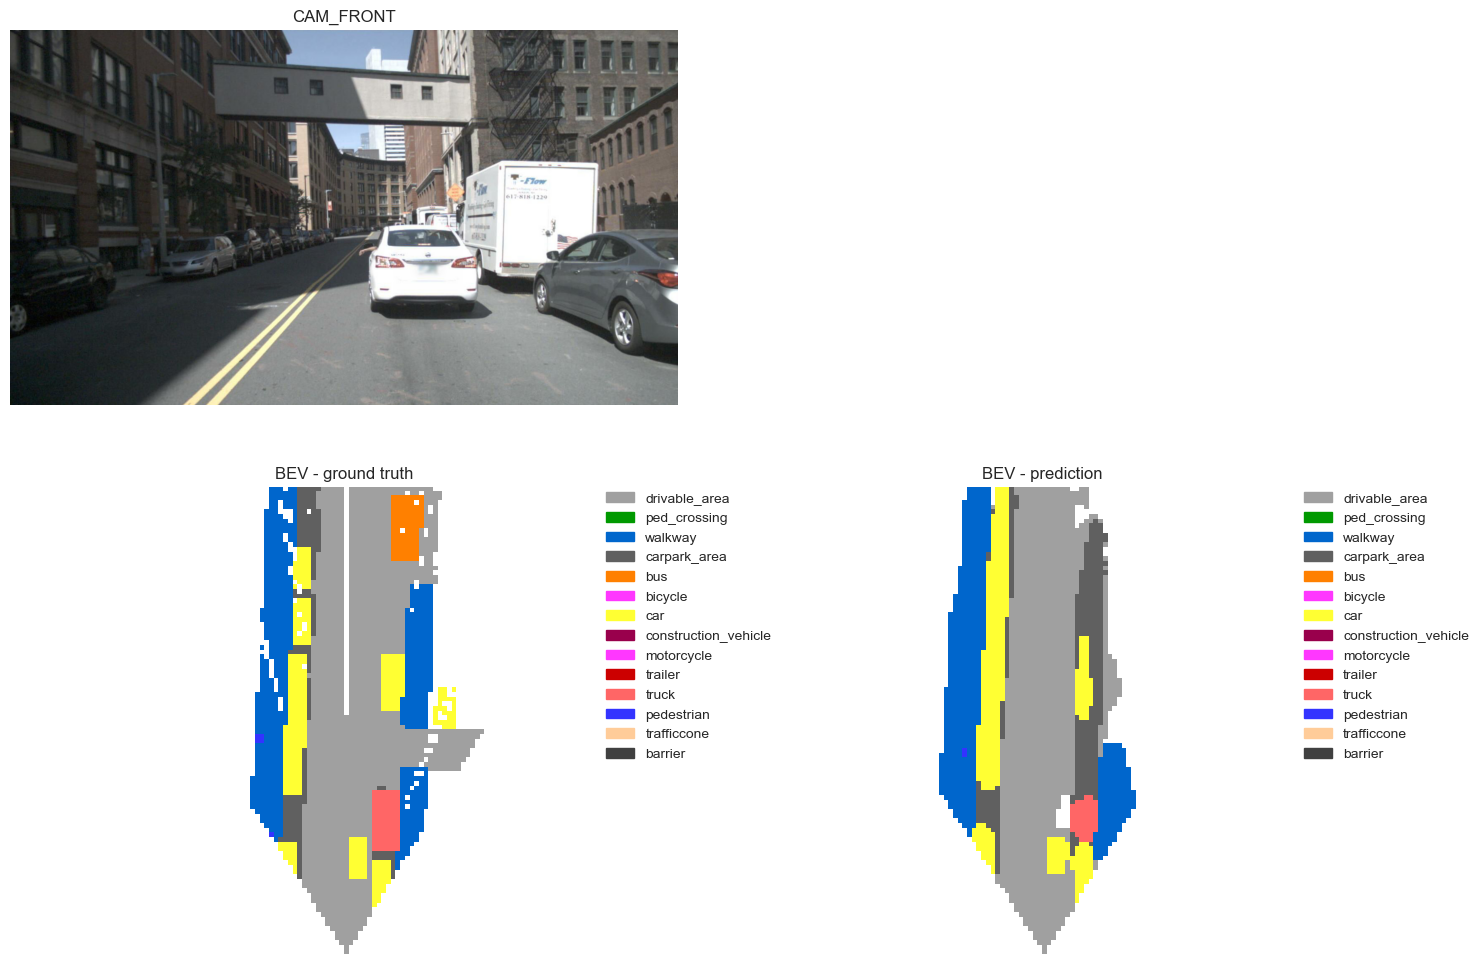

In [34]:
i_sample = 12
image, cls_maps, vis_mask, calib, grid2d = val_data.__getitem__(i_sample)
pred = torch.sigmoid(res_100[i_sample])
visualize_prediction(image, cls_maps, pred, figsize=(15, 10))